# Imports

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [328]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.formula.api import logit

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,\
    QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [329]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    classification_report, precision_score, recall_score, f1_score,\
    roc_curve, auc, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Decision Boundary

## Binary Classification

In [251]:
X,y = make_classification(n_samples=500, n_features=2, n_redundant=0,\
                        n_informative=1, n_clusters_per_class=1, random_state=3,\
                        class_sep=2, flip_y=0.1, n_classes=2)

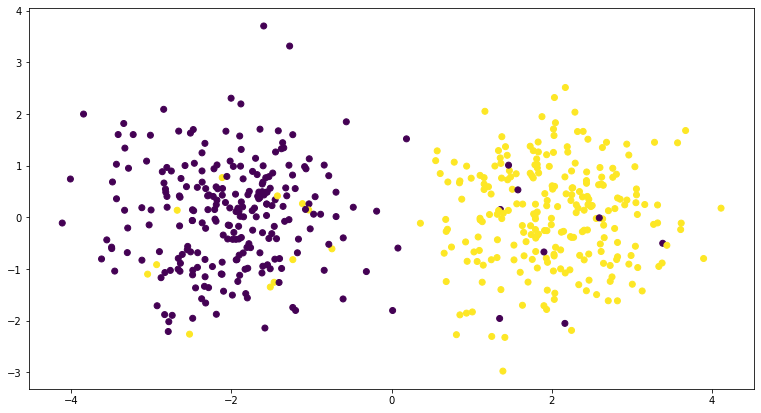

In [252]:
plt.figure(figsize=(13,7))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [253]:
np.unique(y)

array([0, 1])

### Logistic Regression (LR)

In [254]:
model = LogisticRegression()

In [255]:
model.fit(X,y)
model.score(X,y)

0.954

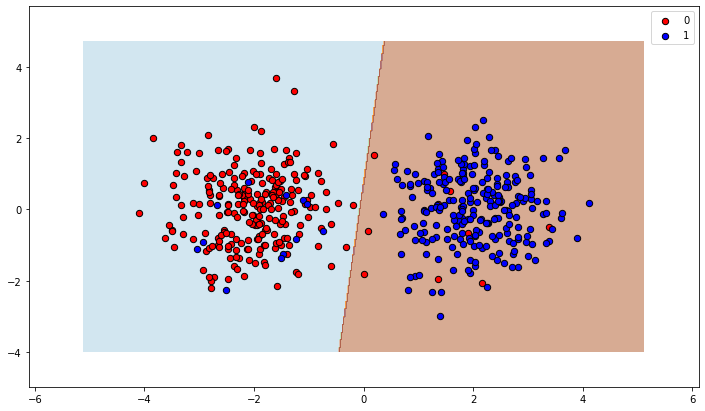

In [256]:
xmin, xmax = np.min(X[:,0])-1, np.max(X[:,0])+1
ymin, ymax = np.min(X[:,1])-1, np.max(X[:,1])+1
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)
xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

colors = 'rb'
class_names = '01'
tt = zip(colors, class_names, range(2))

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()

### Linear Discriminant Analysis (LDA)

In [257]:
model = LinearDiscriminantAnalysis()

In [258]:
model.fit(X,y)
model.score(X,y)

0.954

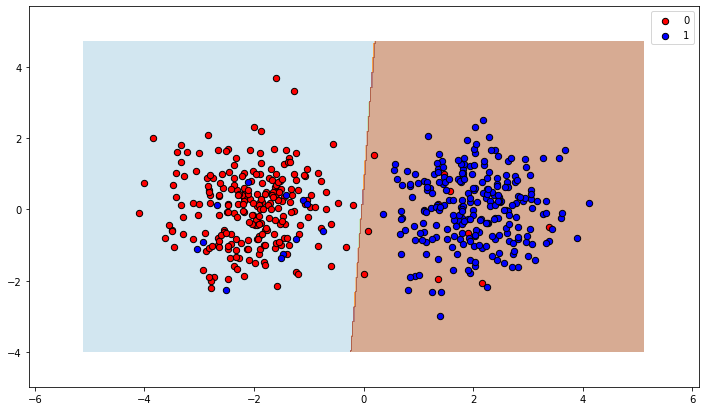

In [259]:
xmin, xmax = np.min(X[:,0])-1, np.max(X[:,0])+1
ymin, ymax = np.min(X[:,1])-1, np.max(X[:,1])+1
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)
xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

colors = 'rb'
class_names = '01'
tt = zip(colors, class_names, range(2))

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()

### Quadratic Discriminant Analysis (QDA)

In [260]:
model = QuadraticDiscriminantAnalysis()

In [261]:
model.fit(X,y)
model.score(X,y)

0.954

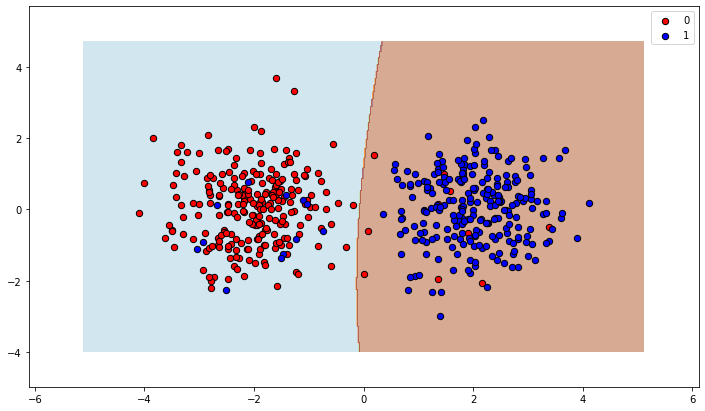

In [262]:
xmin, xmax = np.min(X[:,0])-1, np.max(X[:,0])+1
ymin, ymax = np.min(X[:,1])-1, np.max(X[:,1])+1
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)
xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

colors = 'rb'
class_names = '01'
tt = zip(colors, class_names, range(2))

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()

## Multiclass Classification (3 Classes, 2 Features)

In [263]:
X,y = make_classification(n_samples=500, n_features=2, n_redundant=0,\
                          n_informative=2, n_clusters_per_class=1, random_state=3,\
                          class_sep = 3, flip_y = 0.1, n_classes = 3)

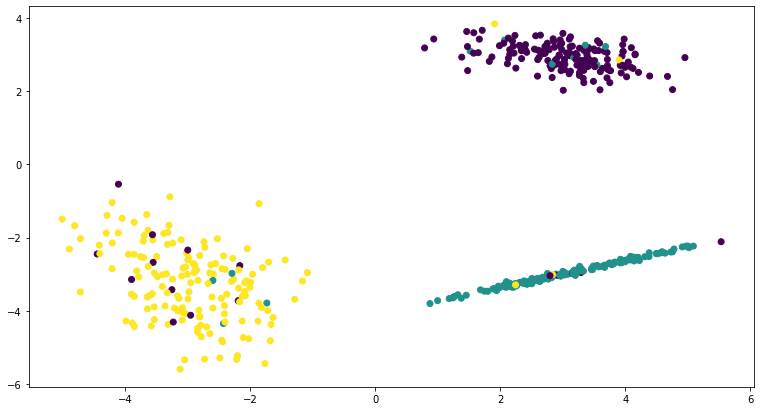

In [264]:
plt.figure(figsize=(13,7))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [265]:
np.unique(y)

array([0, 1, 2])

### Logistic Regression (LR)

In [266]:
model = LogisticRegression()

In [267]:
model.fit(X,y)
model.score(X,y)

0.936

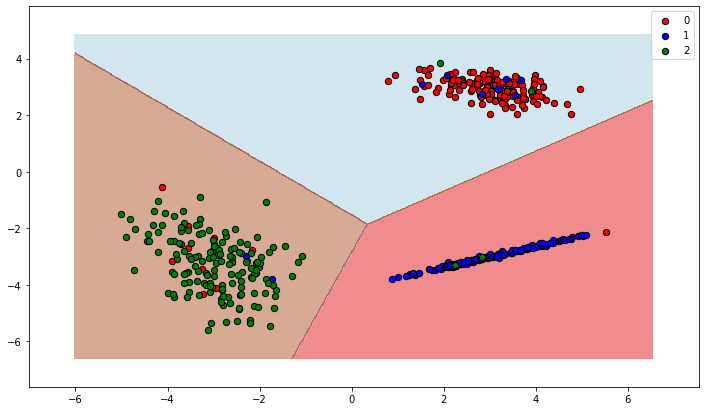

In [268]:
xmin, xmax = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
ymin, ymax = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)

xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

colors = 'rbg'
class_names = '012'
labels = range(3)
tt = zip(colors, class_names, labels)

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()

### Linaear Discriminant Analysis (LDA)

In [269]:
model = LinearDiscriminantAnalysis()

In [270]:
model.fit(X,y)
model.score(X,y)

0.936

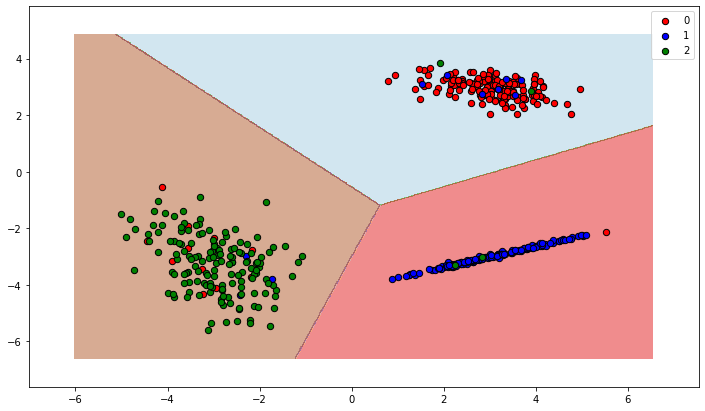

In [271]:
xmin, xmax = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
ymin, ymax = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)

xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

colors = 'rbg'
class_names = '012'
labels = range(3)
tt = zip(colors, class_names, labels)

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()

### Quadratic Discriminant Analysis (QDA)

In [272]:
model = QuadraticDiscriminantAnalysis()

In [273]:
model.fit(X,y)
model.score(X,y)

0.936

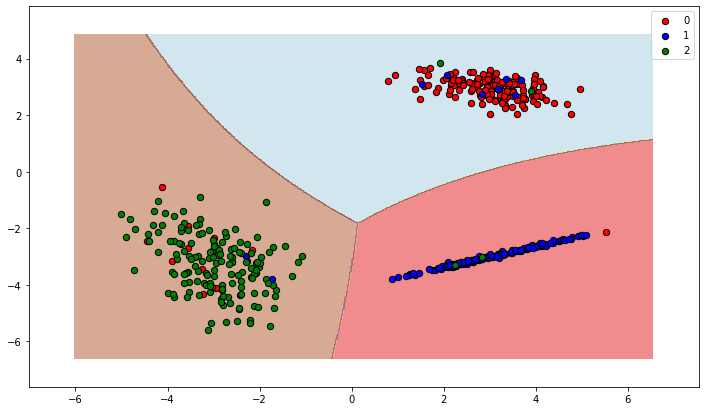

In [274]:
xmin, xmax = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
ymin, ymax = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)

xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

colors = 'rbg'
class_names = '012'
labels = range(3)
tt = zip(colors, class_names, labels)

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()

# Classification Measures
## Multiclass Classification (3 Classes, 10 Features)

In [331]:
X,y = make_classification(n_samples=1500, n_features=10, n_redundant=4,\
                         n_informative=3, n_clusters_per_class=1, random_state=3,\
                         class_sep=2, flip_y=0.2, n_classes=3)

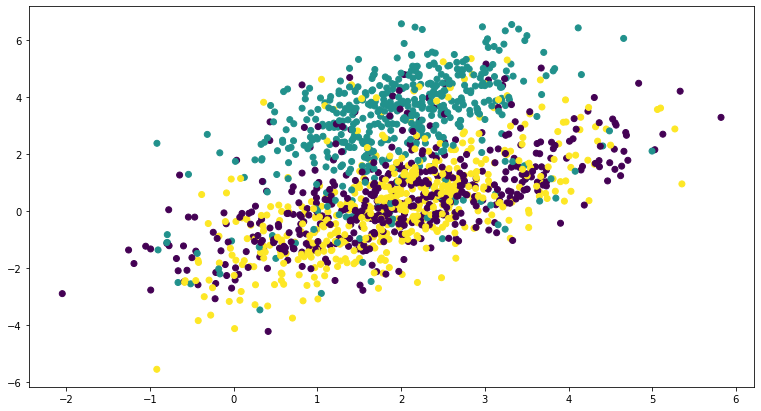

In [332]:
plt.figure(figsize=(13,7))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [333]:
np.unique(y)

array([0, 1, 2])

In [395]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', aspect='equal', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Logistic Regression (LR)

In [396]:
model = LogisticRegression()

In [397]:
model.fit(X,y)
model.score(X,y)

0.832

In [398]:
y_predict = model.predict(X)
y_predict

array([1, 2, 2, ..., 0, 1, 0])

In [399]:
print(confusion_matrix(y, y_predict))

[[406  52  34]
 [ 41 416  37]
 [ 37  51 426]]


Confusion matrix, without normalization
[[406  52  34]
 [ 41 416  37]
 [ 37  51 426]]


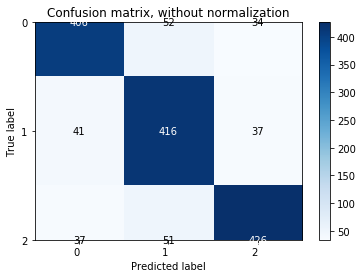

In [400]:
plot_confusion_matrix(y_true=y, y_pred=y_predict, classes=np.array([0,1,2]))
plt.show()

In [282]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       492
           1       0.80      0.84      0.82       494
           2       0.86      0.83      0.84       514

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



In [283]:
print(precision_score(y, y_predict, average=None))

[0.83884298 0.80154143 0.85714286]


In [284]:
print(recall_score(y, y_predict, average=None))

[0.82520325 0.84210526 0.82879377]


In [285]:
print(f1_score(y, y_predict, average=None))

[0.83196721 0.8213228  0.84272997]


0.8829546554394114
0.8935576822466014
0.8928757468370416


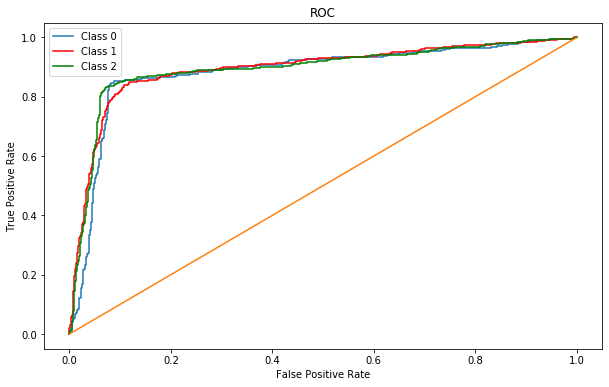

In [286]:
y_score = model.predict_proba(X)
fpr0, tpr0, thresholds0 = roc_curve(y, y_score[:,0], pos_label = 0)
print(auc(fpr0,tpr0))
fpr1, tpr1, thresholds1 = roc_curve(y, y_score[:,1], pos_label = 1)
print(auc(fpr1,tpr1))
fpr2, tpr2, thresholds2 = roc_curve(y, y_score[:,2], pos_label = 2)
print(auc(fpr2,tpr2))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))
plt.plot(fpr0, tpr0, "-", label = "Class 0")
plt.plot(fpr1, tpr1, "-", color = 'r', label = "Class 1")
plt.plot(fpr2, tpr2, "-", color = 'g', label = "Class 2")
plt.plot(x, x, "-", markersize = 1.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC")
plt.show()

0.7563558612085901
0.8148159692791159
0.8106380752609732


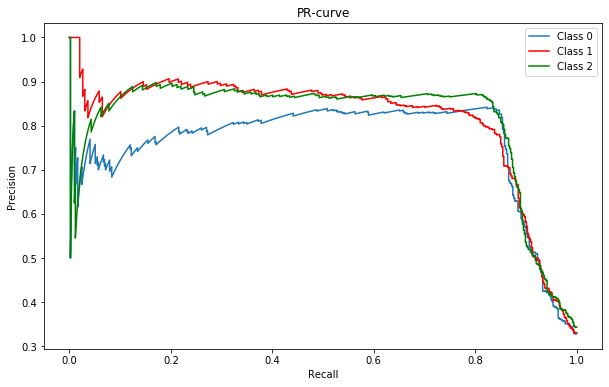

In [287]:
p0, r0, thresholds0 = precision_recall_curve(y, y_score[:,0], pos_label = 0)
print(auc(r0,p0))
p1, r1, thresholds1 = precision_recall_curve(y, y_score[:,1], pos_label = 1)
print(auc(r1,p1))
p2, r2, thresholds2 = precision_recall_curve(y, y_score[:,2], pos_label = 2)
print(auc(r2,p2))

plt.figure(figsize = (10,6))
plt.plot(r0, p0, "-", label = "Class 0")
plt.plot(r1, p1, "-", color = 'r', label = "Class 1")
plt.plot(r2, p2, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")
plt.show()

## Linear Discriminant Analysis (LDA)

In [288]:
model = LinearDiscriminantAnalysis()

In [289]:
model.fit(X,y)
model.score(X,y)

0.8313333333333334

In [290]:
y_predict = model.predict(X)
y_predict

array([1, 1, 2, ..., 0, 1, 0])

In [291]:
print(confusion_matrix(y, y_predict))

[[404  53  35]
 [ 41 420  33]
 [ 37  54 423]]


In [292]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       492
           1       0.80      0.85      0.82       494
           2       0.86      0.82      0.84       514

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



In [293]:
print(precision_score(y, y_predict, average=None))

[0.83817427 0.79696395 0.86150713]


In [294]:
print(recall_score(y, y_predict, average=None))

[0.82113821 0.85020243 0.8229572 ]


In [295]:
print(f1_score(y, y_predict, average=None))

[0.82956879 0.82272282 0.84179104]


0.882029132791328
0.89269041620721
0.8907052825155286


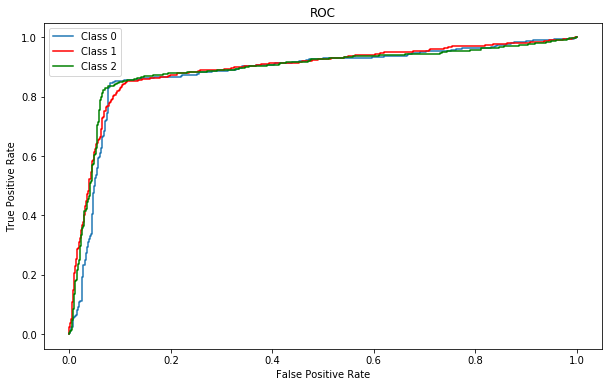

In [296]:
y_score = model.predict_proba(X)
fpr0, tpr0, thresholds0 = roc_curve(y, y_score[:,0], pos_label = 0)
print(auc(fpr0,tpr0))
fpr1, tpr1, thresholds1 = roc_curve(y, y_score[:,1], pos_label = 1)
print(auc(fpr1,tpr1))
fpr2, tpr2, thresholds2 = roc_curve(y, y_score[:,2], pos_label = 2)
print(auc(fpr2,tpr2))

plt.figure(figsize = (10,6))
plt.plot(fpr0, tpr0, "-", label = "Class 0")
plt.plot(fpr1, tpr1, "-", color = 'r', label = "Class 1")
plt.plot(fpr2, tpr2, "-", color = 'g', label = "Class 2")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC")
plt.show()

0.7552616645027328
0.8166144651790117
0.8098532258461524


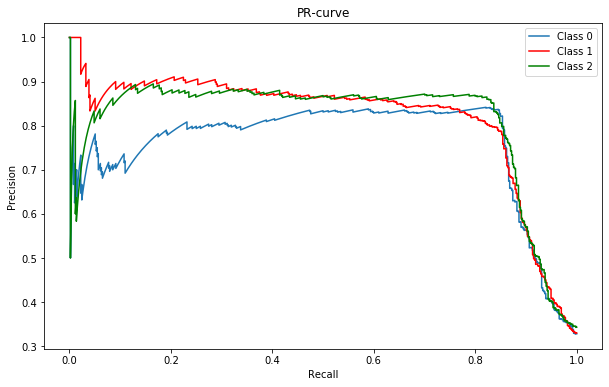

In [297]:
p0, r0, thresholds0 = precision_recall_curve(y, y_score[:,0], pos_label = 0)
print(auc(r0,p0))
p1, r1, thresholds1 = precision_recall_curve(y, y_score[:,1], pos_label = 1)
print(auc(r1,p1))
p2, r2, thresholds2 = precision_recall_curve(y, y_score[:,2], pos_label = 2)
print(auc(r2,p2))

plt.figure(figsize = (10,6))
plt.plot(r0, p0, "-", label = "Class 0")
plt.plot(r1, p1, "-", color = 'r', label = "Class 1")
plt.plot(r2, p2, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")
plt.show()

## Quadratic Discriminant Analysis (QDA)

In [298]:
model = QuadraticDiscriminantAnalysis()

In [299]:
model.fit(X,y)
model.score(X,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.7086666666666667

In [300]:
y_predict=model.predict(X)
y_predict

array([1, 0, 0, ..., 0, 1, 0])

In [301]:
print(confusion_matrix(y, y_predict))

[[407  57  28]
 [ 96 380  18]
 [108 130 276]]


In [302]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       492
           1       0.67      0.77      0.72       494
           2       0.86      0.54      0.66       514

    accuracy                           0.71      1500
   macro avg       0.73      0.71      0.70      1500
weighted avg       0.73      0.71      0.70      1500



In [303]:
print(precision_score(y, y_predict, average=None))

[0.66612111 0.670194   0.85714286]


In [304]:
print(recall_score(y, y_predict, average=None))

[0.82723577 0.76923077 0.53696498]


In [305]:
print(f1_score(y, y_predict, average=None))

[0.73798731 0.71630537 0.66028708]


0.8506319363788877
0.8294967039866066
0.8441429033709285


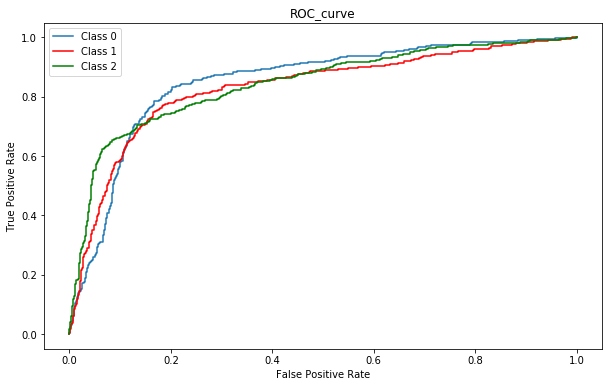

In [306]:
y_score = model.predict_proba(X)
fpr0, tpr0, thresholds0 = roc_curve(y, y_score[:,0], pos_label=0)
print(auc(fpr0, tpr0))
fpr1, tpr1, thresholds1 = roc_curve(y, y_score[:,1], pos_label=1)
print(auc(fpr1, tpr1))
fpr2, tpr2, thresholds2 = roc_curve(y, y_score[:,2], pos_label=2)
print(auc(fpr2, tpr2))

plt.figure(figsize=(10,6))
plt.plot(fpr0, tpr0, "-", label="Class 0")
plt.plot(fpr1, tpr1, "-", color='r', label="Class 1")
plt.plot(fpr2, tpr2, "-", color='g', label="Class 2")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_curve")
plt.legend()
plt.show()

0.695646549421848
0.7009476724879367
0.7591615563002444


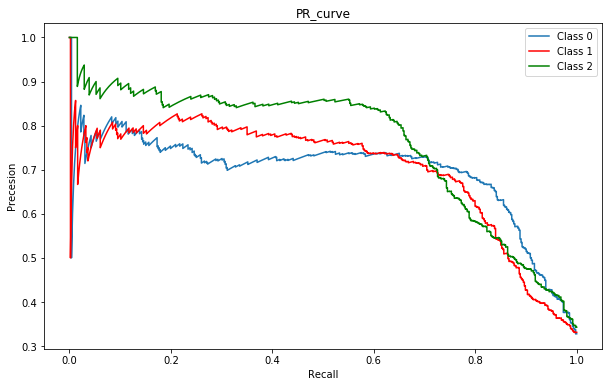

In [307]:
#y_score = model.predict_proba(X)
p0, r0, thresholds0 = precision_recall_curve(y, y_score[:,0], pos_label=0)
print(auc(r0, p0))
p1, r1, thresholds1 = precision_recall_curve(y, y_score[:,1], pos_label=1)
print(auc(r1, p1))
p2, r2, thresholds2 = precision_recall_curve(y, y_score[:,2], pos_label=2)
print(auc(r2, p2))

plt.figure(figsize=(10,6))
plt.plot(r0, p0, "-", label="Class 0")
plt.plot(r1, p1, "-", color='r', label="Class 1")
plt.plot(r2, p2, "-", color='g', label="Class 2")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("PR_curve")
plt.legend()
plt.show()

# Statsmodels Library

In [308]:
X,y = make_classification(n_samples = 1500, n_features = 10, n_redundant = 4, n_informative = 3,
                          n_clusters_per_class  = 1, random_state = 3, class_sep = 1, 
                          flip_y = 0.2, n_classes = 2)

In [309]:
X.shape

(1500, 10)

In [310]:
y.shape
type(y)

numpy.ndarray

In [311]:
y = y.reshape(y.shape[0],1)
y.shape

(1500, 1)

In [312]:
data = np.append(X,y, axis=1)
data = pd.DataFrame(data)
data.columns = np.array(["A","B","C","D","E","F","G","H","I","J","Response"])
data["Response"]=data["Response"].astype(np.int64)
data.head(5)

,A,B,C,D,E,F,G,H,I,J,Response
0,-0.204372,0.127962,0.018368,1.505029,0.159774,0.854578,-1.995061,0.656713,3.452818,-0.677670,0
1,0.740640,0.659706,-0.989340,0.923492,1.232672,0.973544,-0.463160,1.009816,1.942231,-0.206639,0
2,1.728064,1.544157,0.295293,0.992456,-1.495849,1.046969,0.766071,1.543466,1.129554,1.516650,1
3,5.419439,3.944898,-0.422348,1.036030,-1.778653,3.183069,3.778706,4.231484,0.784514,0.259415,1
4,1.003607,1.351423,0.989644,1.261055,1.596084,0.275991,0.327560,0.949773,0.984558,-0.647390,1


In [313]:
model_sm=logit("Response ~ A+B+C+D+E+F+G+H+I+J",data)
mf=model_sm.fit(maxiter=100)
mf.summary()

         Current function value: 0.497187
         Iterations: 100


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Apr 2020   Pseudo R-squ.:                  0.2825
Time:                        23:30:16   Log-Likelihood:                -745.78
converged:                      False   LL-Null:                       -1039.4
Covariance Type:            nonrobust   LLR p-value:                1.293e-123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5750      0.164      9.619      0.000       1.254       1.896
A              0.0122   2.66e+06   4.58e-09      1.000   -5.22e+06    5.22e+06
B              0.3400   2.82e+06   1.21e-07      1.000   -5.52e+06    5.52e+06
C              0.1291      0.066      1.968      0.049       0.001       0.258
D              0.1422   4.72e+06   3.02e-08      1.000   -9.24e+06    9.24e+06
E             -0.0892      0.065     -1.382      0.167      -0.216       0.037
F             -0.6093   3.79e+06  -1.61e-07      1.000   -7.44e+06    7.44e+06
G              0.4899        nan        nan        nan         nan         nan
H             -0.2011    1.9e+06  -1.06e-07      1.000   -3.72e+06    3.72e+06
I             -0.8037      2e+06  -4.03e-07      1.000   -3.91e+06    3.91e+06
J              0.0424      0.065      0.653      0.514      -0.085       0.170
==============================================================================
"""

In [314]:
X[:,0]=1
model=Logit(y,X)
result=model.fit(maxiter=100)
result.summary()

         Current function value: 0.497187
         Iterations: 100


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Apr 2020   Pseudo R-squ.:                  0.2825
Time:                        23:30:16   Log-Likelihood:                -745.78
converged:                      False   LL-Null:                       -1039.4
Covariance Type:            nonrobust   LLR p-value:                1.293e-123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5750      0.164      9.619      0.000       1.254       1.896
x1             0.3438   1.08e+06   3.17e-07      1.000   -2.13e+06    2.13e+06
x2             0.1291      0.066      1.968      0.049       0.001       0.258
x3             0.1422        nan        nan        nan         nan         nan
x4            -0.0892      0.065     -1.382      0.167      -0.216       0.037
x5            -0.6051        nan        nan        nan         nan         nan
x6             0.4947   8.35e+05   5.93e-07      1.000   -1.64e+06    1.64e+06
x7            -0.1963        nan        nan        nan         nan         nan
x8            -0.8037        nan        nan        nan         nan         nan
x9             0.0424      0.065      0.653      0.514      -0.085       0.170
==============================================================================
"""

In [315]:
result.predict(X)

array([0.06814387, 0.29097163, 0.73448024, ..., 0.05449209, 0.7176819 ,
       0.52937967])

# Credit Data